In [2]:
from IPython.core.debugger import set_trace

#%load_ext nb_black

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import time
plt.style.use(style="seaborn")
%matplotlib inline

In [3]:
# Load the dataset using pandas
df = pd.read_csv("VOW3DE.csv")
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1998-07-22,63.148163,65.053703,63.148163,64.596451,34.570709,56336
1,1998-07-23,65.308174,65.816116,61.750568,61.750568,33.047661,95571
2,1998-07-24,60.988155,62.258514,59.869881,61.496101,32.911476,154423
3,1998-07-27,61.496101,62.005039,59.463329,59.717796,31.959759,62875
4,1998-07-28,59.209850,61.445404,57.837109,58.294357,31.197968,116194


In [4]:
df = df[["Close"]].copy()

In [5]:
df.describe()

,Close
count,5803.000000
mean,93.090347
std,59.052075
min,20.924141
25%,33.697311
50%,90.694473
75%,143.464996
max,255.199997


In [6]:
# Check if price series is stationary
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.Close.dropna())
print(f"ADF Statsistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statsistic: -0.8906654527156853
p-value: 0.7910308730839786


# D suchen für die Anzahl der Differenzierungen

In [7]:
from statsmodels.graphics.tsaplots import plot_acf

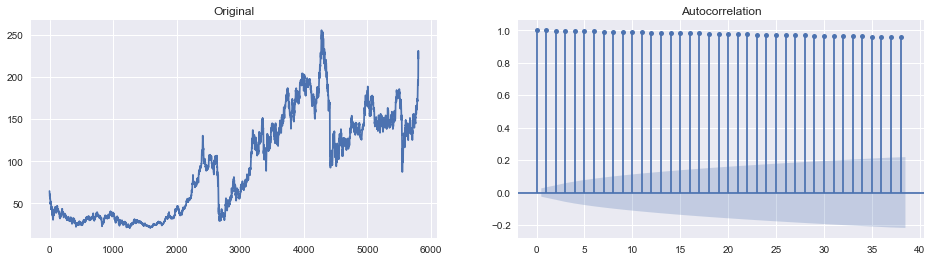

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 4))

ax1.plot(df.Close)
ax1.set_title("Original")
plot_acf(df.Close, ax=ax2);

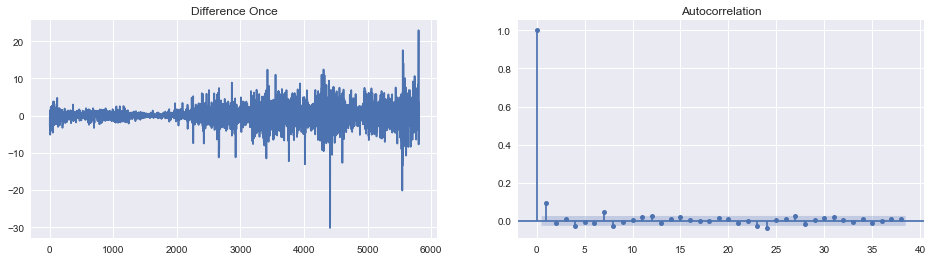

In [9]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference Once")
plot_acf(diff, ax=ax2);

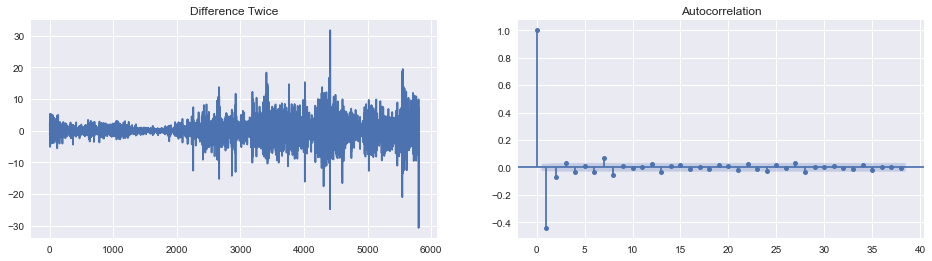

In [10]:
diff = df.Close.diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference Twice")
plot_acf(diff, ax=ax2);

In [11]:
from pmdarima.arima.utils import ndiffs

In [12]:
ndiffs(df.Close, test="adf")

1

# P

P ist AR term. den ausreiser nehmen in der Autocorrelation

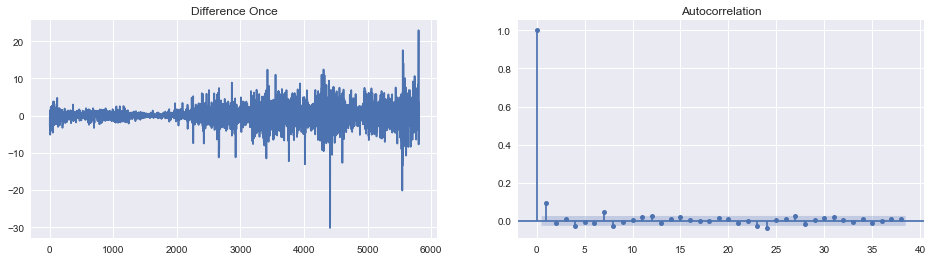

In [13]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference Once")
plot_acf(diff, ax=ax2);

PACF Flag is 1 -> p = 1

# Q MA term das Optimum wählen

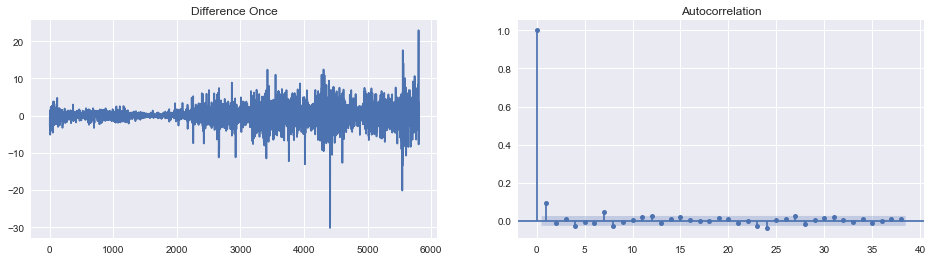

In [14]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference Once")
plot_acf(diff, ax=ax2);

In [61]:
from statsmodels.tsa.arima_model import ARIMA

#Arima Model (p, d, q)
model = ARIMA(df.Close, order=(1,2,2))
result= model.fit(disp=0)

/Users/julie/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/julie/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsm

In [62]:
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.Close   No. Observations:                 5801
Model:                 ARIMA(1, 2, 2)   Log Likelihood              -13003.232
Method:                       css-mle   S.D. of innovations              2.275
Date:                Tue, 06 Apr 2021   AIC                          26016.465
Time:                        10:28:49   BIC                          26049.794
Sample:                             2   HQIC                         26028.059
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.79e-05   1.91e-05      0.937      0.349   -1.95e-05    5.53e-05
ar.L1.D2.Close    -0.3182        nan        nan        nan         nan         nan
ma.L1.D2.Close    -0.5874        nan

/Users/julie/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
